In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

from IPython.display import Image
def draw(A):
    return Image(A.draw(format='png', prog='dot'))

In [4]:
import sys
from pathlib import Path
home = str(Path.home())

sys.path.insert(0,"%s/rankability_toolbox_dev"%home)

In [5]:
import pyrankability

In [6]:
D1999 = pd.read_csv(home+'/college_football_analysis/data/ACC/1999.csv',header=None)
D1999

,0,1,2,3,4,5,6,7,8
0,0,1,0,0,1,0,1,1,1
1,0,0,0,0,1,0,0,1,1
2,1,1,0,1,1,1,1,1,1
3,1,1,0,0,1,1,1,0,0
4,0,0,0,0,0,0,1,0,1
5,1,1,0,0,1,0,0,0,0
6,0,1,0,0,0,1,0,0,0
7,0,0,0,1,1,1,1,0,1
8,0,0,0,1,0,1,1,0,0


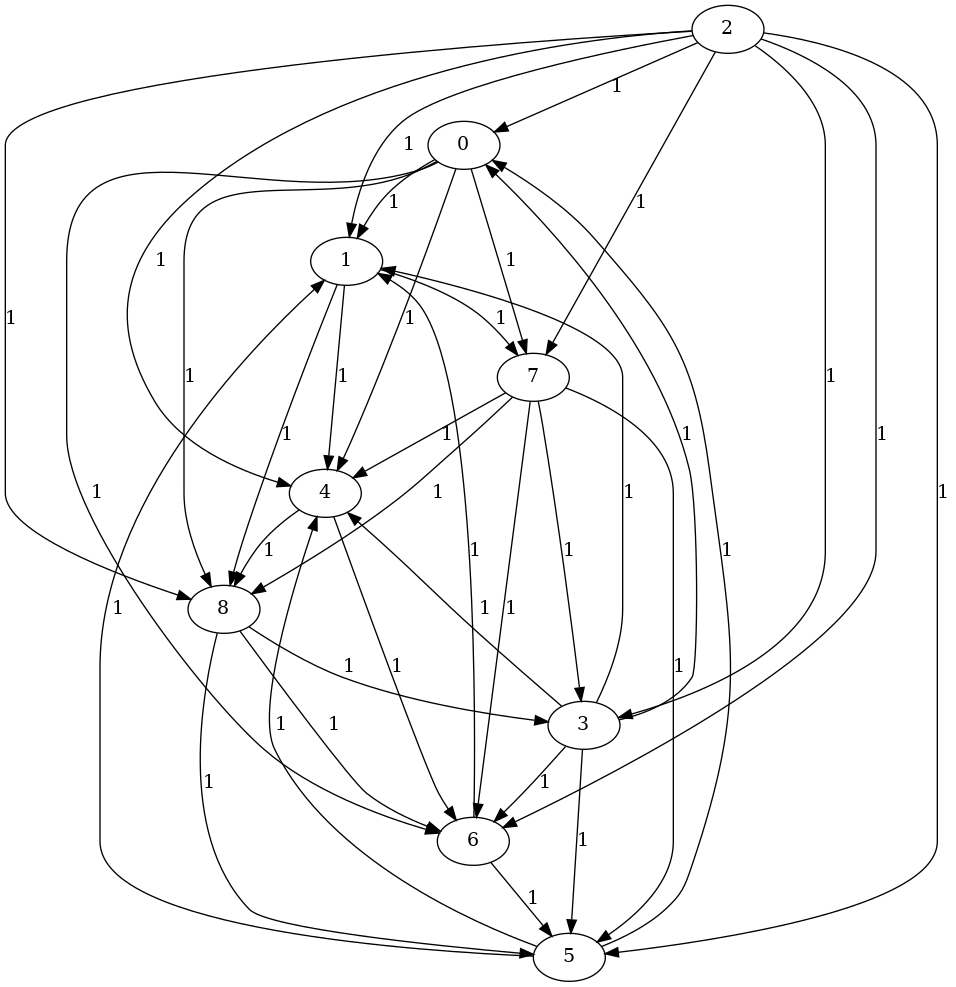

In [7]:
pyrankability.plot.D_as_graph(D1999,file='D1999_graph.png')

## Hillside BILP

In [8]:
k,details = pyrankability.rank.solve(D1999,method='hillside',cont=False)
k

Using license file /home/jupyter-pander14/gurobi.lic
Academic license - for non-commercial use only - expires 2021-01-17


72

### One solution

In [9]:
pd.Series(details['P'][0])

0    2
1    7
2    3
3    0
4    8
5    5
6    1
7    6
8    4
dtype: int64

In [10]:
pd.DataFrame(details['x'])

,0,1,2,3,4,5,6,7,8
0,0,1,0,0,1,1,1,0,1
1,0,0,0,0,1,0,1,0,0
2,1,1,0,1,1,1,1,1,1
3,1,1,0,0,1,1,1,0,1
4,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,1,0,0
6,0,0,0,0,1,0,0,0,0
7,1,1,0,1,1,1,1,0,1
8,0,1,0,0,1,1,1,0,0


## Hillside LP

In [11]:
k,details = pyrankability.rank.solve(D1999,method='hillside',cont=True)
k

72

In [12]:
pd.DataFrame(pyrankability.common.threshold_x(details['x']))

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0
1,0.0,0.0,0.0,0.0,1.0,0.5,1.0,0.0,0.5
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.5,1.0,0.0,0.0,1.0,1.0,1.0,0.5,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0
5,0.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.5
6,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
7,0.5,1.0,0.0,0.5,1.0,1.0,1.0,0.0,1.0
8,0.0,0.5,0.0,0.0,1.0,0.5,1.0,0.0,0.0


## Most distant pairs

In [13]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D1999,method='hillside',verbose=False)
details_two_distant['obj']

7.0

In [14]:
def calc_tau(n,obj):
    nchoose2 = pyrankability.common.nCr(n,2)
    tau = (nchoose2 - obj)/nchoose2
    return tau

In [15]:
calc_tau(len(D1999),details_two_distant['obj'])

0.8055555555555556

In [16]:
details_two_distant['perm_x']

(2, 0, 3, 7, 1, 5, 8, 6, 4)

In [17]:
details_two_distant['perm_y']

(2, 7, 3, 0, 8, 5, 1, 4, 6)

In [18]:
list(details_two_distant['perm_x'])

[2, 0, 3, 7, 1, 5, 8, 6, 4]

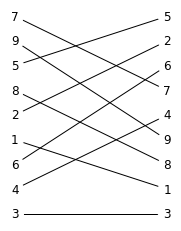

In [28]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(1+np.array(details_two_distant['perm_x']),1+np.array(details_two_distant['perm_y'])),file="example_2_max_pair",width=3,height=4)

In [20]:
details_two_distant['obj']

7.0

## LOP

In [21]:
k,details = pyrankability.rank.solve(D1999,method='lop',cont=False)
k

6

In [22]:
pd.Series(details['P'][0])

0    2
1    7
2    3
3    5
4    0
5    1
6    4
7    8
8    6
dtype: int64

In [23]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D1999,method='lop',verbose=False)
details_two_distant['obj']

12.0

In [24]:
calc_tau(len(D1999),details_two_distant['obj'])

0.6666666666666666

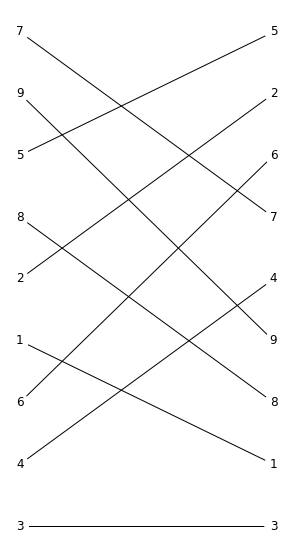

In [25]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(1+np.array(details_two_distant['perm_x']),1+np.array(details_two_distant['perm_y'])),file="example_1_max_pair")

### LOP LP

In [26]:
k,details = pyrankability.rank.solve(D1999,method='lop',cont=True)
k

9

In [27]:
pd.DataFrame(pyrankability.common.threshold_x(details['x']))

,0,1,2,3,4,5,6,7,8
0,0.000000,1.000000,0.0,0.357096,1.000000,0.626943,1.000000,0.741163,1.000000
1,0.000000,0.000000,0.0,0.000000,1.000000,0.269847,0.642904,0.384067,0.642904
2,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.642904,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.384067,0.642904
4,0.000000,0.000000,0.0,0.000000,0.000000,0.269847,0.642904,0.000000,0.642904
5,0.373057,0.730153,0.0,0.000000,0.730153,0.000000,0.373057,0.114220,0.373057
6,0.000000,0.357096,0.0,0.000000,0.357096,0.626943,0.000000,0.000000,0.000000
7,0.258837,0.615933,0.0,0.615933,1.000000,0.885780,1.000000,0.000000,1.000000
8,0.000000,0.357096,0.0,0.357096,0.357096,0.626943,1.000000,0.000000,0.000000
